In [1]:
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.logging import transpile_benchy_logger

In [2]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/qft.txt")

In [3]:
coupling_map = CouplingMap.from_line(64)
# coupling_map = CouplingMap.from_heavy_hex(5)

# XXX we hardcoded layout to not be parallelized to avoid a pipe error
# before collecting data for this result -> change the hardcoded value

# maybe requires downgrading to 3.9 to get this to work....????

transpilers = [
    QiskitLevel3(coupling_map, python_sabre=True),
    Mirage(coupling_map, use_fast_settings=True, name="Mirage", parallel=True),
]

In [4]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    num_runs=1,
    logger=transpile_benchy_logger,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Circuits from library:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:transpile_benchy:Running benchmark for circuit qft_n16


Loading qft_n16 from RedQueen
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 2.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 3.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Circuits from library:  20%|██        | 1/5 [00:18<01:14, 18.75s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n24


Loading qft_n24 from MQTBench


Circuits from library:  40%|████      | 2/5 [00:51<01:20, 26.92s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n32


Loading qft_n32 from MQTBench


Circuits from library:  60%|██████    | 3/5 [01:54<01:26, 43.30s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n48


Loading qft_n48 from MQTBench


Circuits from library:  80%|████████  | 4/5 [04:34<01:29, 89.46s/it]INFO:transpile_benchy:Running benchmark for circuit qft_n64


Loading qft_n64 from MQTBench


Circuits from library: 100%|██████████| 5/5 [10:09<00:00, 121.95s/it]


In [5]:
benchmark.summary_statistics(transpilers[0], transpilers[1])

{'total_runtime': {'average_change': -33.427093149128005,
  'aggregrate_change': -41.9205952567934,
  'best_circuit': 'qft_n64',
  'worst_circuit': 'qft_n24'}}

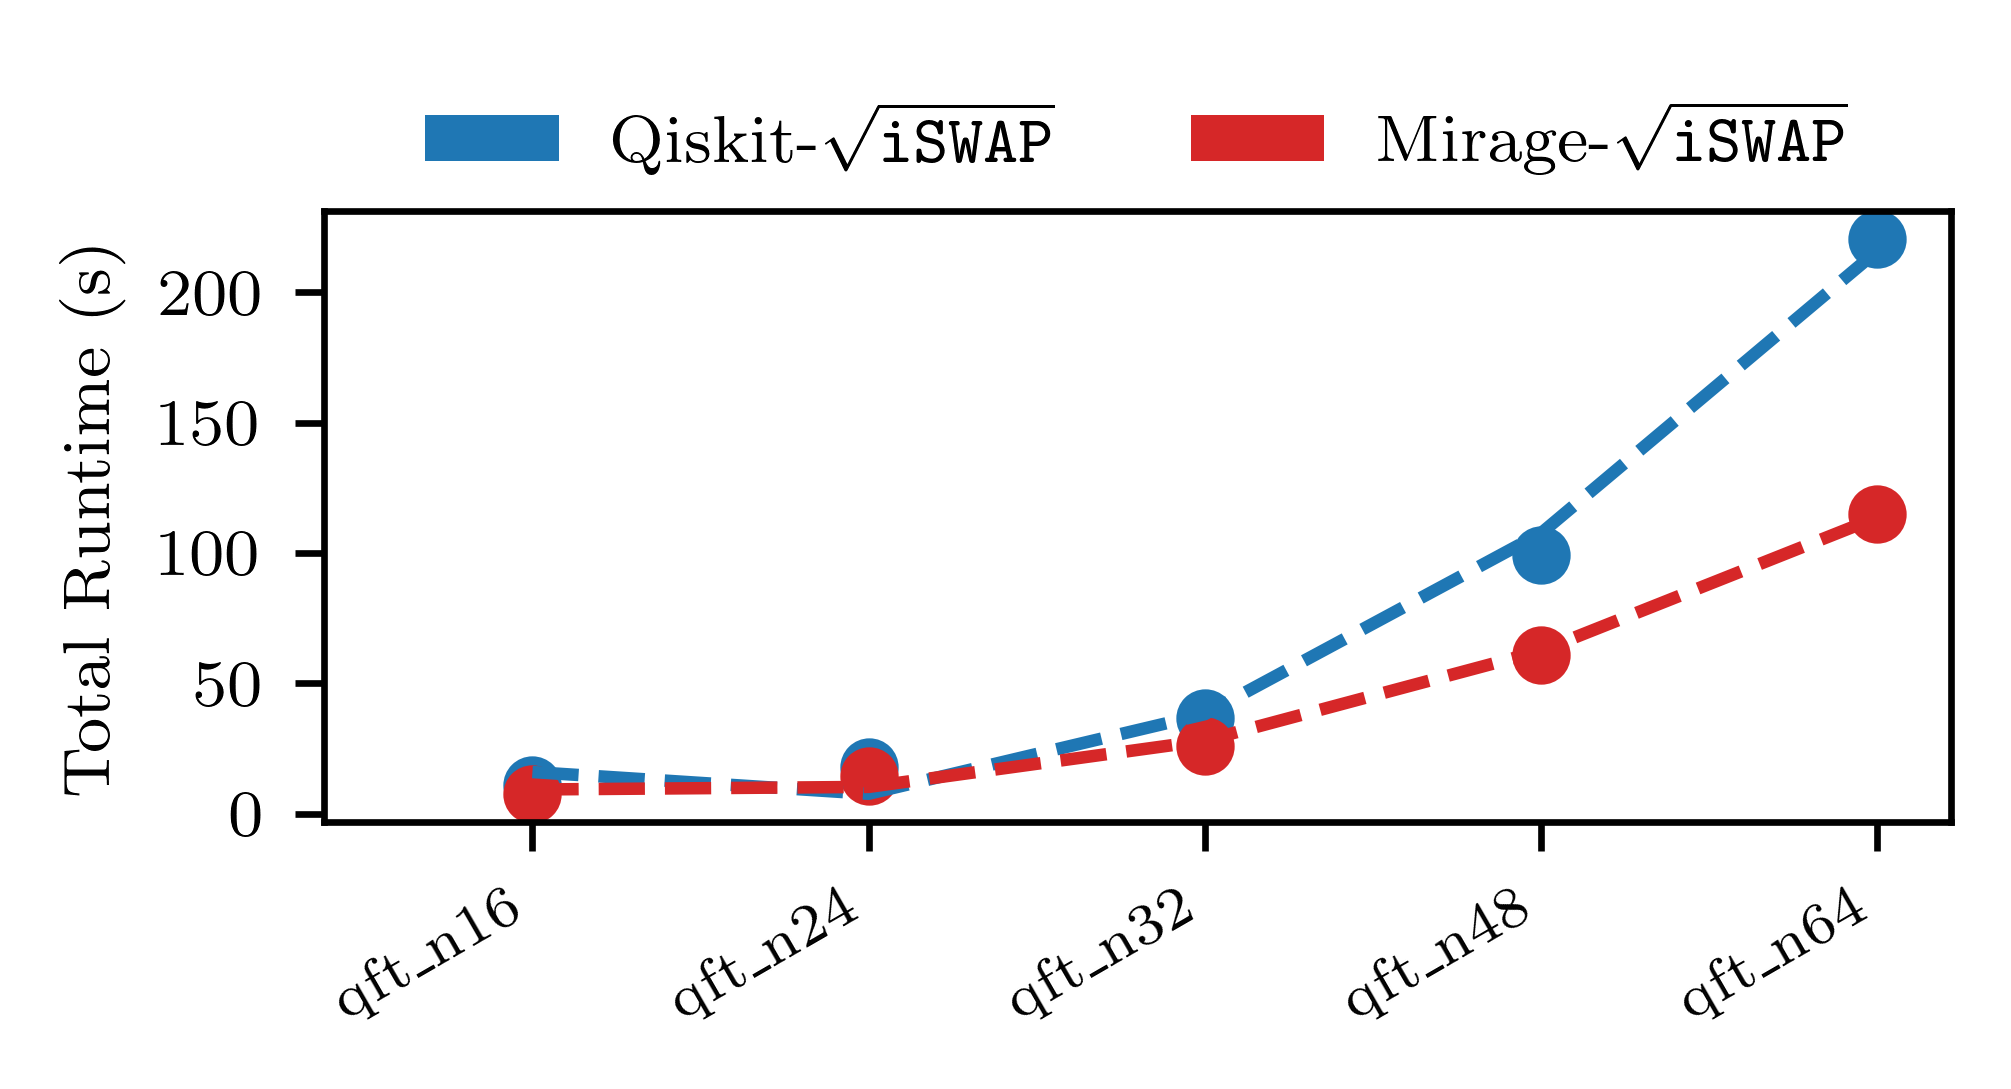

In [14]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=1,
    legend_show=1,
    filename="speed",
    plot_type="trendline",
    color_override=[0, 3],
)

In [7]:
print(benchmark)


Transpiler: Mirage-$\sqrt{\texttt{iSWAP}}$

  Metric: total_runtime
  Circuit: qft_n16                                  Mean result: 7.519                          Trials: [7.519355058670044]
  Circuit: qft_n24                                  Mean result: 14.503                         Trials: [14.502845764160156]
  Circuit: qft_n32                                  Mean result: 26.060                         Trials: [26.06027626991272]
  Circuit: qft_n48                                  Mean result: 60.931                         Trials: [60.931487798690796]
  Circuit: qft_n64                                  Mean result: 114.847                        Trials: [114.84657549858093]

Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$
  Circuit: qft_n16                                  Mean result: 11.054                         Trials: [11.054018259048462]
  Circuit: qft_n24                                  Mean result: 18.050                         Trials: [18.050408124923706]
  Circuit: qft